# Python Final Project 

### Samantha Bothwell 

##### May 21st, 2021

In [4]:
import csv 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Clear console
from IPython.display import clear_output

In [5]:
# Bank account class
class Account:
    """ Models a bank account """

    # Initialize account characterisitcs 
    def __init__(self, number, name, age, residency, balance, opened_date):
        """ Initialize the instance variables of a bank account object. The entry 
        parameters are Account Number, Name on the account, Age, State of Residency, 
        Current Balance and Date in which the Account was Opened."""
        self.number = number
        self.name = name
        self.age = age
        self.residency = residency
        self.balance = balance
        self.opened_date = opened_date

    # Please delete the pass statement and implement the deposit method.
    # This method should be used to deposit a certain amount of money to an account.
    # Add proper formal parameters for the function if needed.
    def deposit(self, deposit):
        """ Add a certain amount of money to an account. """
        while deposit < 0: 
            print("You cannot deposit a negative amount.")
            deposit = float(input("Enter an amount to deposit : "))
        
        self.balance += deposit
        print('Your New Account Balance is $', self.balance)

    # Please delete the pass statement and implement the withdraw method.
    # This method should be used to withdraw a certain amount of money from an account.
    # Add proper formal parameters for the function if needed.
    def withdraw(self, withdraw):
        """ Remove a certain amount of money from an account. """
        withdraw = float(input("Enter an amount to withdraw : "))
        while withdraw < 0: 
            print("You cannot withdraw a negative amount.")
            deposit = float(input("Enter an amount to withdraw : "))
        
        if self.balance < withdraw : 
            print("You have insufficient funds to withdraw $", withdraw)
        else: 
            self.balance -= withdraw
            print('Your New Account Balance is $', self.balance)

    # Please delete the pass statement and implement the transfer method.
    # This method should be used to transfer a certain amount of money
    # from an account to another account.
    # Add proper formal parameters for the function if needed.
    def transfer(self, new_account, transfer):
        """ Transfer a certain amount of money from an account to another account. """ 
        while transfer < 0 : 
            print("You cannot transfer a negative amount.")
            transfer = float(input("Enter the amount to transfer : " ))
        
        if self.balance < transfer : 
            print("You have insufficient funds to transfer $", transfer)
        else: 
            self.balance -= transfer
            new_account.balance += transfer 
            print('Your New Account Balance is $', self.balance)

    # If you want to define other methods to manage the instance variables,
    # please add your codes here in the class.
    
def user_login():
    """ Ask the user to provide username and password for login.
        The user will exit the system if three successive incorrect
        username and/or password are provided. """
    username = input("Username : ")
    password = input("Password : ")
    
    attempts = 1 
    
    while username != "BIOS6642" or password != "python" and attempts < 3: 
        print("The username and/or password you provided was not correct. Please try again.")
        username = input("Username : ")
        password = input("Password : ")
        attempts += 1
        
    if attempts == 3: 
        print("You have entered the wrong username/password too many times.")
        ## Stop running the program  
        exit()
        
# Please delete the pass statement and implement the database_initialization function.
# Add proper formal parameters for the function if needed.
def database_initialization():
    """ Read the account data file and initialize the database for the account management system. """
    data = open('account_data.csv', 'r')
    f_csv = csv.reader(data)
    accounts = pd.DataFrame(f_csv) # convert to pandas
    new_header = accounts.iloc[0] #grab the first row for the header
    accounts = accounts[1:] #take the data less the header row
    accounts.columns = new_header #set the header row as the df header
    
    # Convert Account number and balance to numeric 
    accounts["Account number"] = pd.to_numeric(accounts["Account number"])
    accounts["Balance"] = pd.to_numeric(accounts["Balance"])
    accounts["Age"] = pd.to_numeric(accounts["Age"])
    return accounts

def user_selection(accounts):
    """ Provide data management operations/options for the system. """
    # Clear console 
    clear_output()
    
    # Print main menu
    main_menu()
    
    # Get input
    value = int(input("What would you like to do? (Enter 1-7 or 99) : "))
    
    if value == 99: 
        exit()
    
    # account statistics 
    elif value == 2: 
        account_stats(accounts)
    
    # print accounts 
    elif value == 3: 
        print_accounts(accounts)
    
    elif value == 4: 
        query_accounts(accounts)
        
    # print subset of accounts
    elif value == 8: 
        subset_data(accounts)
        

def main_menu(): 
        print(' _______________________________________________________ ')
        print('|                                                       |')
        print('|                       MAIN MENU                       |')
        print('|_______________________________________________________|')
        print('                                                         ')
        print('        1. Display all accounts                          ')
        print('        2. Account statistics                            ')
        print('        3. Display sorted accounts                       ')
        print('        4. Query an account                              ')
        print('        5. Create a new account                          ')
        print('        6. Delete an account                             ')
        print('        7. Specified account transactions                ')
        print('        8. Display subset of accounts                    ')
        print('        99. Quit the program                             ')
        print('                                                         ')
        
def print_data(data):
    header = list(data.columns.values)
    print('                                                                        ')
    print('_____________________________________________________________________')
    print('                                                                        ')
    print("{0:>15} {1:>8} {2:>8} {3:>12} {4:>10} {5:>10}".format(header[0], header[1], header[2], header[3], header[4], header[5]))
    print('_____________________________________________________________________')
    for i in range(0, len(data)):
        row = data.iloc[i]
        print("{0:>15} {1:>8} {2:>8} {3:>12} {4:>10} {5:>10}".format(row[0], row[1], row[2], row[3], row[4], row[5]))
    print('')
        
def print_accounts(accounts): 
    # Make dictionary for sorting based on column
    sort_dict = {1: "Account number", 2: "Name", 3: "Balance", 4: "Date"}

    # Set default sort to 'Account number'
    sort = 1
    while sort < 5: 
        clear_output()
        df_sorted = accounts.sort_values(by = sort_dict[sort])
        df_sorted = df_sorted.reset_index(drop = True)
        
        # Print from function 
        print_data(df_sorted)
        
        # Ask how to sort accounts
        sort = int(input("Sort by 1) Account number, 2) Account Owner's Name, 3) Current Balance, 4) Date account was opened, 5) Return to main menu, 99) Quit Program : "))

    if sort == 5: 
        user_selection(database_initialization())
    elif sort == 99: 
        exit()
    else:
        print("You did not provide a valid value. Returning to main menu.")
        user_selection(database_initialization())
        
def account_stats(accounts): 
 
    group = int(input("You may view summary statistics by 1) Overall, 2) Age Category or 3) State of Residency : "))
    
    view = 1
    while view == 1: 
        clear_output()
        header = ['OVERALL', 'Total', 'Average', 'Median', 'OVER AGE GROUP', 'OVER STATE OF RESIDENCY', 'Age Category', 'State']

        # Overall grouping
        if group == 1: 
            # Account stats 
            # Over entire group
            print('')
            print("{0:20}".format(header[0]))
            print('')
            print("{0:>10} {1:>12} {2:>12}".format(header[1], header[2], header[3]))
            print('______________________________________')
            print(("{0:>10} {1:>12} {2:>12}".format(accounts["Balance"].sum(), round(accounts["Balance"].mean(), 2), 
                                                     accounts["Balance"].median())))
        # Age grouping
        elif group == 2:
            # Over age group
            age_accounts = accounts
            age_accounts["Age Category"] = (np.where(age_accounts['Age'] < 34, 'Under 35',
                                           np.where(age_accounts['Age'] < 45, '35 - 44', 
                                           np.where(age_accounts['Age'] < 55, '45 - 54', 
                                           np.where(age_accounts['Age'] < 65, '55 - 64',
                                           np.where(age_accounts['Age'] < 75, '65 - 74', '75 and older'))))))
            age_sum = age_accounts.groupby(["Age Category"])[["Balance"]].sum()
            age_mean = round(age_accounts.groupby(["Age Category"])[["Balance"]].mean(),2)
            age_med = age_accounts.groupby(["Age Category"])[["Balance"]].median()

            # Merge Data frames
            age_sum = age_sum.merge(age_mean, left_on='Age Category', right_on='Age Category')
            age_sum = age_sum.merge(age_med, left_on='Age Category', right_on='Age Category')

            # Print
            print('')
            print("{0:20}".format(header[4]))
            print('')
            print("{0:>12} {1:>12} {2:>12} {3:>12}".format(header[6], header[1], header[2], header[3]))
            print('_____________________________________________________')

            index = age_sum.index
            age_cat = list(index)
            means = []
            meds = []

            for i in range(0, len(age_sum)):
                row = age_sum.iloc[i]
                means.append(row[1])
                meds.append(row[2])
                print("{0:>12} {1:>12} {2:>12} {3:>12}".format(age_cat[i], row[0], row[1], row[2]))

            x = np.arange(len(age_cat))  # the label locations
            width = 0.35  # the width of the bars

            fig, ax = plt.subplots()
            rects1 = ax.bar(x - width/2, means, width, label = 'Average Balance')
            rects2 = ax.bar(x + width/2, meds, width, label = 'Median Balance')

            # Add some text for labels, title and custom x-axis tick labels, etc.
            ax.set_ylabel('Balance')
            ax.set_title('Balance Summaries by Age Category')
            ax.set_xticks(x)
            ax.set_xticklabels(age_cat)
            ax.legend()
            # fig.tight_layout()

            fig = plt.gcf()
            fig.set_size_inches(15, 8)

            plt.show()

        # State Grouping
        elif group == 3: 
            # Over state of residency 
            state_sum = accounts.groupby(["Residency"])[["Balance"]].sum()
            state_mean = round(accounts.groupby(["Residency"])[["Balance"]].mean(),2)
            state_med = accounts.groupby(["Residency"])[["Balance"]].median()

            # Merge Data frames
            state_sum = state_sum.merge(state_mean, left_on='Residency', right_on='Residency')
            state_sum = state_sum.merge(state_med, left_on='Residency', right_on='Residency')

            # Print
            print('')
            print("{0:20}".format(header[5]))
            print('')
            print("{0:>12} {1:>12} {2:>12} {3:>12}".format(header[7], header[1], header[2], header[3]))
            print('_____________________________________________________')

            index = state_sum.index
            state_cat = list(index)
            means = []
            meds = []

            for i in range(0, len(state_sum)):
                row = state_sum.iloc[i]
                means.append(row[1])
                meds.append(row[2])
                print("{0:>12} {1:>12} {2:>12} {3:>12}".format(state_cat[i], row[0], row[1], row[2]))

            print('')
            print('')

            x = np.arange(len(state_cat))  # the label locations
            width = 0.35  # the width of the bars

            fig, ax = plt.subplots()
            rects1 = ax.bar(x - width/2, means, width, label = 'Average Balance')
            rects2 = ax.bar(x + width/2, meds, width, label = 'Median Balance')

            # Add some text for labels, title and custom x-axis tick labels, etc.
            ax.set_ylabel('Balance')
            ax.set_title('Balance Summaries by State')
            ax.set_xticks(x)
            ax.set_xticklabels(state_cat)
            ax.legend()
            # fig.tight_layout()

            fig = plt.gcf()
            fig.set_size_inches(15, 8)

            plt.show()

        else: 
            print("You did not return a valid value. Returning to main menu.")
            user_selection(database_initialization())

        # Ask again about viewing
        view = int(input("Would you like to 1) View more summary statistics, 2) Return to main menu or 99) Quit program : "))

        if view == 1: 
            group = int(input("You may view summary statistics by 1) Overall, 2) Age Category or 3) State of Residency : "))
        elif view == 2: 
            user_selection(database_initialization())
        elif view == 99: 
            exit()
        else: 
            print("You did not return a valid value. Returning to main menu.")
            user_selection(database_initialization())
            
def subset_data(accounts):
    # subset data 

    choice = int(input("Would you like to subset by 1) Age, 2) State or Residency or 3) Date account was opened : "))

    subset = 1 
    while subset == 1: 
        clear_output()

        # Subset by Age 
        if choice == 1:
            min_age = 2
            max_age = 1 
            while min_age > max_age: 
                try: 
                    min_age = int(input("Enter a minimum age :"))
                except ValueError: 
                    min_age = int(input("Enter a minimum age :"))

                try: 
                    max_age = int(input("Enter a maximum age :"))
                except ValueError: 
                    max_age = int(input("Enter a maximum age :"))


            age_accounts = accounts
            age_accounts = age_accounts.loc[age_accounts['Age'] > min_age]
            age_accounts = age_accounts.loc[age_accounts['Age'] < max_age] 
            age_accounts = age_accounts.sort_values(by = "Age")
            age_accounts = age_accounts.reset_index(drop = True)

            # Print from function 
            print_data(age_accounts)

        # Subset by state
        elif choice == 2:
            state_accounts = accounts
            states = state_accounts.Residency.unique()

            state_filter = 'null'
            while state_filter not in states: 
                state_filter = input("Provide a state to filter by (Colorado, Utah, California, Washington, New York, Texas, Florida or Wyoming) : ")

            state_accounts = state_accounts.loc[state_accounts['Residency'] == state_filter]
            state_accounts = state_accounts.sort_values(by = "Account number")
            state_accounts = state_accounts.reset_index(drop = True)

            # Print from function 
            print_data(state_accounts)

        elif choice == 3: 
            date_accounts = accounts
            date_accounts['Date2'] = pd.to_datetime(date_accounts['Date'], format='%m/%d/%y')

            min_date = pd.to_datetime('5/21/21', format='%m/%d/%y')
            max_date = pd.to_datetime('5/20/21', format='%m/%d/%y')
            while max_date < min_date: 
                try: 
                    min_date = pd.to_datetime(input('Enter a minimum date as (m/d/y). For example (5/21/21) :'), format='%m/%d/%y')
                except TypeError: 
                    min_date = pd.to_datetime(input('Type Error! Enter a minimum date as (m/d/y). For example (5/21/21) :'), format='%m/%d/%y')
                except ValueError: 
                    min_date = pd.to_datetime(input('Value Error! Enter a minimum date as (m/d/y). For example (5/21/21) :'), format='%m/%d/%y')

                try: 
                    max_date = pd.to_datetime(input('Enter a maximum date as (m/d/y). For example (5/21/21) :'), format='%m/%d/%y')
                except TypeError: 
                    max_date = pd.to_datetime(input('Type Error! Enter a maximum date as (m/d/y). For example (5/21/21) :'), format='%m/%d/%y')
                except ValueError: 
                    max_date = pd.to_datetime(input('Value Error! Enter a maximum date as (m/d/y). For example (5/21/21) :'), format='%m/%d/%y')

            date_accounts = date_accounts.loc[date_accounts['Date2'] > min_date]
            date_accounts = date_accounts.loc[date_accounts['Date2'] < max_date]
            date_accounts = date_accounts.sort_values(by = "Date2")
            date_accounts = date_accounts.reset_index(drop = True)
            del date_accounts['Date2']

            # Print from function 
            print_data(date_accounts)

        else: 
            print("You did not return a valid value. Returning to main menu.")
            exit()

        subset = int(input("Would you like to 1) Try another subset, 2) Return to main menu or 99) Quit program : "))

        if subset == 1: 
            choice = int(input("Would you like to subset by 1) Age, 2) State or Residency or 3) Date account was opened : "))
        elif subset == 2: 
            user_selection(database_initialization())
        elif subset == 99: 
            exit()
        else: 
            print("You did not return a valid value. Returning to main menu.")
            user_selection(database_initialization())
            
def query_accounts(accounts):
    # Select Accounts
    view = 1
    while view == 1: 
        clear_output()
        # Ask filtering criteria
        filter_accounts = accounts
        try: 
            criteria = int(input("You may either specify 1) An account number or 2) An account owner's name : "))
        except ValueError: 
            criteria = int(input("You may either specify 1) An account number or 2) An account owner's name : "))

        # Filter by account number
        if criteria == 1:
            # Get unique account numbers
            account_nums = filter_accounts["Account number"]
            account_nums = account_nums.unique()

            number = 0
            attempts = 0
            while number not in account_nums and attempts < 5:
                number = int(input("Enter an existing account number : "))
                attempts += 1
            if attempts == 5:
                print("You've entered a non-existing account number 5 times. Returning to main menu.")
                # user_selection(database_initialization())

            # Filter by account number
            filter_accounts = filter_accounts.loc[filter_accounts['Account number'] == number]

            # Print from function 
            print_data(filter_accounts)

        # Filter by Name 
        elif criteria == 2: 
            # Get unique names 
            account_names = filter_accounts.Name.unique()

            name = "null"
            attempts = 0
            while name not in account_names and attempts < 5:
                name = input("Enter an existing account owner : ")
                attempts += 1
            if attempts == 5:
                print("You've entered a non-existing account owner 5 times. Returning to main menu.")
                # user_selection(database_initialization())

            # Filter by account number
            filter_accounts = filter_accounts.loc[filter_accounts['Name'] == name]

            # Print from function 
            print_data(filter_accounts)


        else: 
            print("You did not return a valid value. Returning to main menu.")
            # user_selection(database_initialization())

        # Ask again about viewing
        view = int(input("Would you like to 1) Change query, 2) Return to main menu or 99) Quit program : "))

        if view == 1:
            criteria = int(input("You either specify 1) An account number or 2) An account owner's name : "))
        elif view == 2: 
            user_selection(database_initialization())
        elif view == 99: 
            exit()
        else: 
            print("You did not return a valid value. Returning to main menu.")
            user_selection(database_initialization())


# main function
def main(database_filename):
    # User login
    # Please implement the user_login function (and add proper formal parameters if needed)
    user_login()

    # Database initialization: initialize the bank account management system database
    # Please implement the database_initialization function (and add proper formal parameters if needed)
    database_initialization()

    # Bank account management via user selection
    # Please implement the user_selection function (and add proper formal parameters if needed)
    user_selection(database_initialization())

In [21]:
a1 = Account('371', 'Ella', 57, 'Colorado', 1263210, '3/26/11')
a2 = Account('129', 'Zoe', 30, 'Colorado', 79934, '8/20/18')
# a1.deposit(-1000)
a1.transfer(a2, 1000)
a2.transfer(a1, 90000)

Your New Account Balance is $ 1262210
You have insufficient funds to transfer $ 90000



OVER AGE GROUP      

Age Category        Total      Average       Median
_____________________________________________________
     35 - 44    2146372.0     429274.4      95427.0
     45 - 54    1228369.0    307092.25     149915.5
     55 - 64    1446230.0    482076.67      99523.0
     65 - 74     841410.0     280470.0     230902.0
75 and older    1872565.0    468141.25     396825.5
    Under 35    1264219.0    105351.58      20105.5


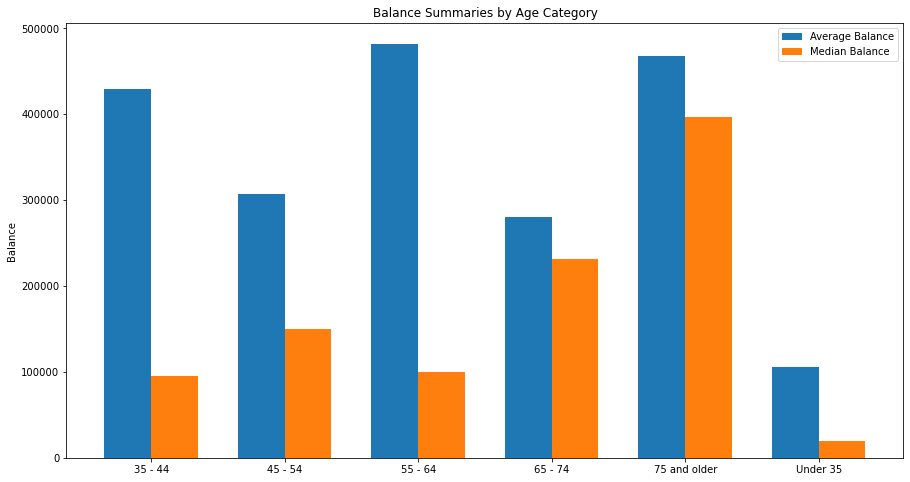

Would you like to 1) View more summary statistics, 2) Return to main menu or 99) Quit program : 99


In [6]:
# Run the main function
database_filename = 'account_data.csv' # Assume this file is in your current working directory
main(database_filename)

In [17]:
import csv 
import pandas as pd
import numpy as np

# Clear console
from IPython.display import clear_output

data = open('account_data.csv', 'r')
f_csv = csv.reader(data)
accounts = pd.DataFrame(f_csv) # convert to pandas
new_header = accounts.iloc[0] #grab the first row for the header
accounts = accounts[1:] #take the data less the header row
accounts.columns = new_header #set the header row as the df header

# Convert Account number and balance to numeric 
accounts["Account number"] = pd.to_numeric(accounts["Account number"])
accounts["Balance"] = pd.to_numeric(accounts["Balance"])
accounts["Age"] = pd.to_numeric(accounts["Age"])


You may either specify 1) An account number or 2) An account owner's name : 20
You did not return a valid value. Returning to main menu.


KeyboardInterrupt: Interrupted by user